In [90]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns 
from functions import *
from sklearn.linear_model import LinearRegression

In [91]:
df = pd.read_csv("Data/consommation.csv",
                 encoding = "ISO-8859-1",
                 engine='python',
                 sep="\t")
df=df[['Mois','Territoire','Consommation totale']]

In [92]:
consommation_france=df.loc[df['Territoire']=='France',['Mois','Consommation totale']]
consommation_france=consommation_france.drop(consommation_france.index[0]).reset_index(drop=True)
consommation_france['Mois']=pd.to_datetime(consommation_france["Mois"])
consommation_france=consommation_france.loc[consommation_france['Consommation totale']>0,:]

In [93]:
consommation_france=consommation_france.rename(columns={'Consommation totale': 'Consommation_totale'})

In [94]:
consommation_france.head(n=3)

,Mois,Consommation_totale
0,2010-01-01,56342
1,2010-02-01,48698
2,2010-03-01,48294


In [95]:
consommation_france.tail(n=3)

,Mois,Consommation_totale
112,2019-05-01,35599
113,2019-06-01,32571
114,2019-07-01,34606


In [96]:
consommation_france.info()
#On peut noter que nous n'avons pas de données manquantes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 2 columns):
Mois                   115 non-null datetime64[ns]
Consommation_totale    115 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.7 KB


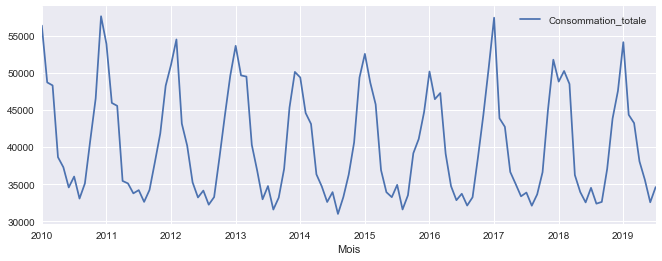

In [97]:

sns.set(rc={'figure.figsize':(11, 4)})
consommation_france.plot(y="Consommation_totale",x='Mois')

# Jeu de données météo

https://cegibat.grdf.fr/simulateur/calcul-dju

![title](img/clime.png)

![title](img/chauffage.png)


# Climatisation

In [98]:
meteo=pd.read_excel('Data/climatisation.xlsx',skiprows=11)

In [99]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
Année    10 non-null int64
JAN      10 non-null int64
FÉV      10 non-null int64
MAR      10 non-null int64
AVR      10 non-null float64
MAI      10 non-null float64
JUN      10 non-null float64
JUI      10 non-null float64
AOÛ      10 non-null float64
SEP      10 non-null float64
OCT      10 non-null float64
NOV      10 non-null int64
DÉC      10 non-null int64
Total    10 non-null float64
dtypes: float64(8), int64(6)
memory usage: 1.2 KB


In [100]:
meteo=meteo.set_index('Année')
meteo=meteo.drop(columns=['Total'])

In [101]:
meteo=meteo.rename(columns={"JAN": "01",
                      "FÉV":"02",
                      "MAR":"03",
                      "AVR":"04",
                      "MAI":"05",
                      "JUN":"06",
                      "JUI":"07",
                      "AOÛ":"08",
                      "SEP":"09",
                      "OCT":"10",
                      "NOV":"11",
                      "DÉC":"12"})

In [102]:
meteo

,01,02,03,04,05,06,07,08,09,10,11,12
Année,,,,,,,,,,,,
2019,0,0,0,0.7,0.0,9.6,0.0,0.0,0.0,0.0,0,0
2018,0,0,0,6.9,18.4,32.6,137.9,78.0,9.4,4.3,0,0
2017,0,0,0,0.0,24.7,69.9,60.1,37.6,1.2,0.0,0,0
2016,0,0,0,0.0,0.0,14.4,58.1,70.0,28.5,0.0,0,0
2015,0,0,0,0.0,0.6,34.6,92.8,73.7,0.0,0.0,0,0
2014,0,0,0,0.0,0.0,13.7,56.0,10.7,14.1,0.0,0,0
2013,0,0,0,0.0,0.0,13.5,98.6,42.0,9.7,0.0,0,0
2012,0,0,0,0.0,12.1,10.4,32.3,63.2,7.3,0.0,0,0
2011,0,0,0,1.4,5.1,31.1,7.2,34.9,23.2,4.3,0,0


In [103]:
meteo_newformat={'mois':[],'climatisation':[]}

In [104]:
for Année in meteo.index.values:
    for mois in meteo.columns:
        meteo_newformat['mois'].append(f"{Année}-{mois}-01")
        meteo_newformat['climatisation'].append(meteo.loc[Année,mois])

In [105]:
meteo_newformat=pd.DataFrame(meteo_newformat)
meteo_newformat['mois']=pd.to_datetime(meteo_newformat['mois'])

In [106]:
meteo_newformat.head(n=6)

,mois,climatisation
0,2019-01-01,0.0
1,2019-02-01,0.0
2,2019-03-01,0.0
3,2019-04-01,0.7
4,2019-05-01,0.0
5,2019-06-01,9.6


# Chauffage

In [107]:
meteo_chau=pd.read_excel('Data/chauffage.xlsx',skiprows=11)
#meteo.info()
meteo_chau=meteo_chau.set_index('Année')
meteo_chau=meteo_chau.drop(columns=['Total'])
meteo_chau=meteo_chau.rename(columns={"JAN": "01",
                      "FÉV":"02",
                      "MAR":"03",
                      "AVR":"04",
                      "MAI":"05",
                      "JUN":"06",
                      "JUI":"07",
                      "AOÛ":"08",
                      "SEP":"09",
                      "OCT":"10",
                      "NOV":"11",
                      "DÉC":"12"})

In [108]:
meteo_chau

,01,02,03,04,05,06,07,08,09,10,11,12
Année,,,,,,,,,,,,
2019,466.9,324.3,295.1,223.5,176.8,26.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,365.4,488.6,376.3,170.5,93.5,26.1,1.2,17.0,70.5,171.7,342.5,387.9
2017,529.9,334.4,268.1,242.6,114.6,27.4,14.9,25.9,115.4,158.7,342.6,431.0
2016,426.4,379.6,383.1,272.1,141.6,64.9,20.2,13.8,41.1,238.0,345.6,452.8
2015,454.0,421.7,337.5,198.8,151.3,45.6,22.6,19.4,130.9,238.9,254.7,310.1
2014,386.4,337.9,285.9,195.5,160.1,51.5,25.3,56.3,44.3,147.2,282.6,430.2
2013,491.2,458.2,438.6,265.7,220.4,87.3,9.2,19.8,84.1,162.8,363.9,411.5
2012,398.0,493.9,263.9,290.3,127.3,79.8,46.3,9.7,104.9,215.2,356.2,407.9
2011,454.0,360.8,305.1,126.4,88.8,68.4,53.4,34.1,56.6,183.0,286.6,374.7


In [109]:
meteo_newformat_chau={'mois':[],'chauffage':[]}

for Année in meteo.index.values:
    for mois in meteo_chau.columns:
        meteo_newformat_chau['mois'].append(f"{Année}-{mois}-01")
        meteo_newformat_chau['chauffage'].append(meteo_chau.loc[Année,mois])

meteo_newformat_chau=pd.DataFrame(meteo_newformat_chau)
meteo_newformat_chau['mois']=pd.to_datetime(meteo_newformat_chau['mois'])

In [110]:
meteo_newformat_chau.head(n=6)

,mois,chauffage
0,2019-01-01,466.9
1,2019-02-01,324.3
2,2019-03-01,295.1
3,2019-04-01,223.5
4,2019-05-01,176.8
5,2019-06-01,26.0


# Dju

In [111]:
dju=meteo_newformat.merge(meteo_newformat_chau,on='mois',how='inner')

In [112]:
dju['dju']=dju['chauffage']+dju['climatisation']
dju.head()

,mois,climatisation,chauffage,dju
0,2019-01-01,0.0,466.9,466.9
1,2019-02-01,0.0,324.3,324.3
2,2019-03-01,0.0,295.1,295.1
3,2019-04-01,0.7,223.5,224.2
4,2019-05-01,0.0,176.8,176.8


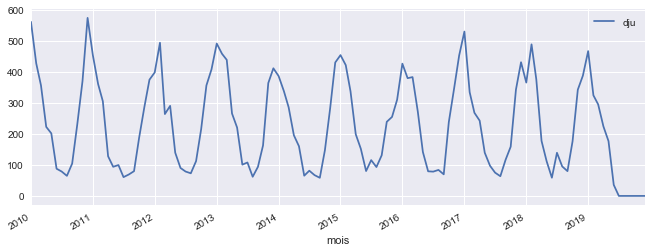

In [113]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
# Série sunspot : nombre annuel de tâches solaires de 1790 à 1970
dju.plot(y="dju",x='mois')

# Merge

In [114]:
print(dju.shape)

(120, 4)


In [115]:
print(consommation_france.shape)

(115, 2)


In [116]:
df=consommation_france.merge(dju,left_on='Mois',right_on='mois')

In [117]:
df

,Mois,Consommation_totale,mois,climatisation,chauffage,dju
0,2010-01-01,56342,2010-01-01,0.0,561.2,561.2
1,2010-02-01,48698,2010-02-01,0.0,427.4,427.4
2,2010-03-01,48294,2010-03-01,0.0,356.5,356.5
3,2010-04-01,38637,2010-04-01,0.3,222.3,222.6
4,2010-05-01,37284,2010-05-01,7.4,194.2,201.6
...,...,...,...,...,...,...
110,2019-03-01,43223,2019-03-01,0.0,295.1,295.1
111,2019-04-01,38078,2019-04-01,0.7,223.5,224.2
112,2019-05-01,35599,2019-05-01,0.0,176.8,176.8
113,2019-06-01,32571,2019-06-01,9.6,26.0,35.6


In [118]:
print(df.columns)

Index(['Mois', 'Consommation_totale', 'mois', 'climatisation', 'chauffage',
       'dju'],
      dtype='object')


In [119]:
df=df.drop(['mois','chauffage','climatisation'],axis=1).set_index('Mois')
df=df.fillna(0)

In [120]:
df= df[:-1]

In [121]:
df.describe()

,Consommation_totale,dju
count,114.000000,114.000000
mean,40427.929825,238.847368
std,7256.588773,144.873970
min,31004.000000,35.600000
25%,33938.500000,97.850000
50%,38027.500000,221.500000
75%,46314.250000,363.125000
max,57600.000000,574.000000


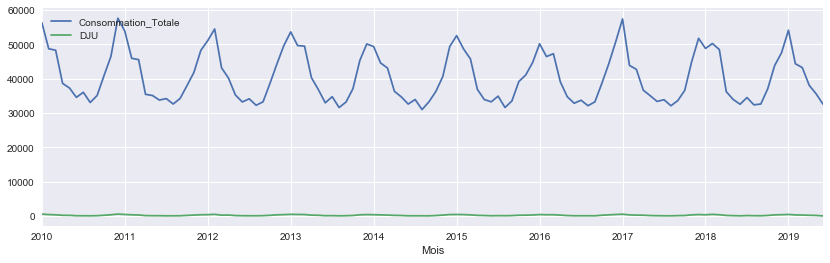

In [122]:
df['Consommation_totale'].plot(figsize=(14,4),label="Consommation_Totale")
df['dju'].plot(figsize=(14,4),label="DJU")
plt.legend()

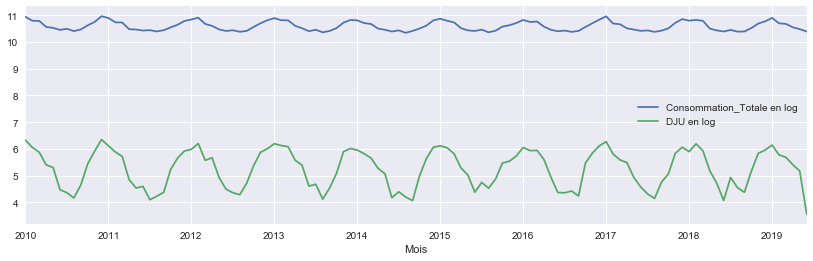

In [123]:
np.log(df['Consommation_totale']).plot(figsize=(14,4),label="Consommation_Totale en log")
np.log(df['dju']).plot(figsize=(14,4),label="DJU en log")
plt.legend()

# Désaisonnalisez à l'aide de la régression linéaire¶

![title](img/additif-multi.png)

Rq: modele additif ou multiplicatif ? 
    regarder les écarts sur une série temporelle mensuelle qui a une saisonnalité 
    annuelle (tous les deux points).
    Il suffit de regarder les écarts entre les piques et les creux 
    sur une période, si cet écart s accroit ou decroit on est sur un 
    modele multiplicatif

Rq: time serie a 3 choses
    -une tendance (traduit le niveau moyen de la serie temp)
    -une saisonnalité (c'est l ensemble des fluctualitées qu on va retrouver ds la ST, qlq chose de périodque)
    -un résidu (la part qu'on ne peut pas expliquer)

In [124]:
df.head(n=2)

,Consommation_totale,dju
Mois,,
2010-01-01,56342,561.2
2010-02-01,48698,427.4


In [125]:
df['t']=range(1, df.shape[0]+1)

In [126]:
df.head(n=5)

,Consommation_totale,dju,t
Mois,,,
2010-01-01,56342,561.2,1
2010-02-01,48698,427.4,2
2010-03-01,48294,356.5,3
2010-04-01,38637,222.6,4
2010-05-01,37284,201.6,5


In [127]:
y=df['Consommation_totale']
x=df.drop(columns=['Consommation_totale'])

In [128]:
from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(x, y)
regression=reg.fit(x, y)
regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
print(reg.coef_,reg.intercept_)
#Ici nous avons le coefficient du dju et le 2ème coeff correspond à t=temps
#les coeff sont affichés ds cette ordre puisque ils sont ds cet ordre ds le dataset


[49.02224916 -9.16414303] 29246.032843906793


In [130]:
c = reg.coef_[0]

In [131]:
serie_corrigee = df['Consommation_totale'] - df['dju']*c

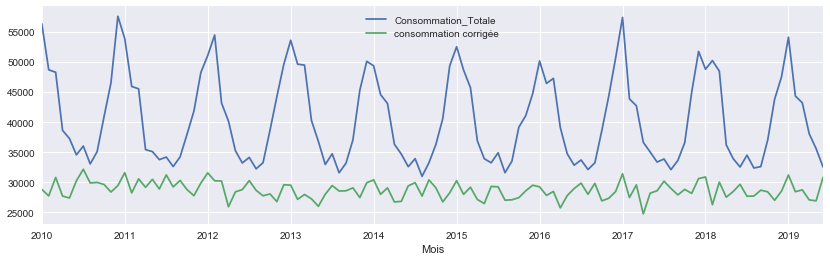

In [132]:
#serie_corrigee = x_cvs.rename("CVS")
df['Consommation_totale'].plot(figsize=(14,4),label="Consommation_Totale")
serie_corrigee.plot(label='consommation corrigée')
plt.legend()

# Statsmodel

In [133]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [134]:
reg_multip = smf.ols('Consommation_totale ~ t+dju', data=df).fit()

In [135]:
print(reg_multip.summary())

                             OLS Regression Results                            
Dep. Variable:     Consommation_totale   R-squared:                       0.963
Model:                             OLS   Adj. R-squared:                  0.963
Method:                  Least Squares   F-statistic:                     1464.
Date:                 Sat, 14 Dec 2019   Prob (F-statistic):           1.67e-80
Time:                         10:18:01   Log-Likelihood:                -986.02
No. Observations:                  114   AIC:                             1978.
Df Residuals:                      111   BIC:                             1986.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.925e+04    348.793     83.84

In [136]:
serie_corr_df = pd.DataFrame({'Mois':serie_corrigee.index, 'corrigee':serie_corrigee.values})

# Test de normalité des résidus 

In [137]:
from scipy.stats import shapiro
shapiro(reg_multip.resid)

(0.9929186701774597, 0.8298814296722412)

[('Lagrande multiplier statistic', 2.966956165680193), ('p-value', 0.22684732092459436), ('f-value', 1.4830365944120227), ('f p-value', 0.23140907327643306)]
Shapiro pvalue : 0.8298641443252563


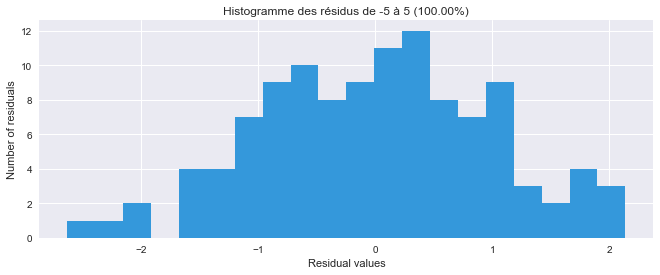

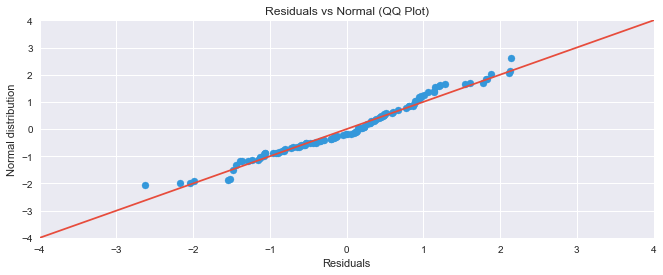

In [138]:
from functions1 import *
linear_regression_analysis(reg_multip)

# Désaisonnaliser 

In [139]:
serie_corr_df.tail(n=8)

,Mois,corrigee
106,2018-11-01,27023.879664
107,2018-12-01,28546.269553
108,2019-01-01,31223.511870
109,2019-02-01,28443.084599
110,2019-03-01,28756.534274
111,2019-04-01,27087.211739
112,2019-05-01,26931.866349
113,2019-06-01,30825.807930


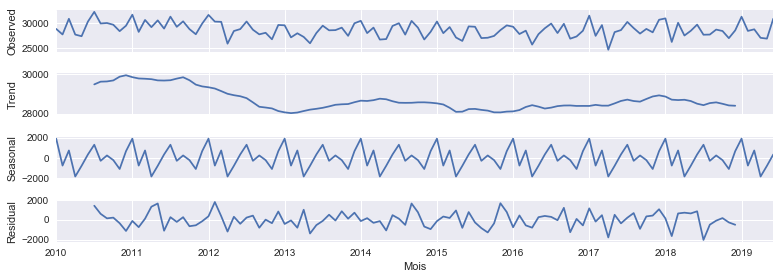

In [140]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomp_x = seasonal_decompose(serie_corrigee,  model='additive')
decomp_x.plot()
plt.show()

In [141]:
serie_corr_df['corrigee-saison']=serie_corrigee.values-decomp_x.seasonal.values

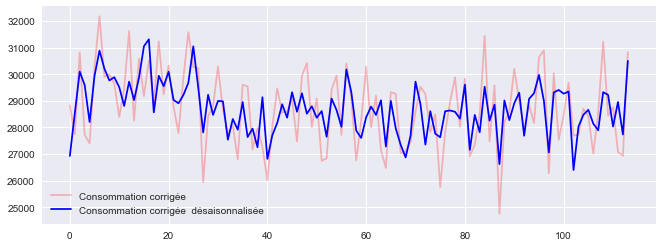

In [142]:
plt.plot(serie_corr_df["corrigee"],'r', label="Consommation corrigée",alpha=0.25)
plt.plot(serie_corr_df["corrigee-saison"],'b', label="Consommation corrigée  désaisonnalisée")
plt.legend()
plt.show()

Et enfin pour la méthode de Holt-Winters :

In [143]:
x_tronc = serie_corr_df.iloc[:-12,:]

In [144]:
from statsmodels.tsa.api import ExponentialSmoothing

y= np.asarray(x_tronc["corrigee"])
hw = ExponentialSmoothing(y, 
                          seasonal_periods=12, trend='add', 
                          seasonal='add').fit()
hw_pred = hw.forecast(12)



In [145]:
hw.params

{'damping_slope': nan,
 'initial_level': 29791.185056049595,
 'initial_seasons': array([  379.16182439, -1975.54212323,  -303.70236598, -2742.1890055 ,
        -1990.84496782, -1123.71287812,   520.22175536, -1248.49471197,
         -776.44399661, -1289.36873876, -2359.538323  ,  -485.64321008]),
 'initial_slope': 2.0330987152966977,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.19180784634020323,
 'smoothing_seasonal': 1.6553580777641798e-13,
 'smoothing_slope': 3.676077920429302e-15,
 'use_boxcox': False}

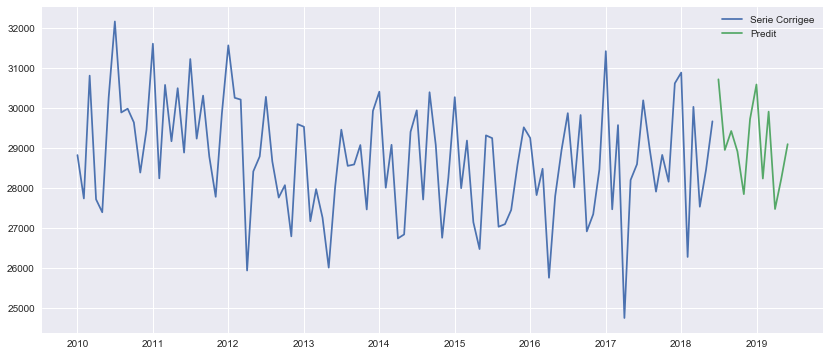

In [146]:
plt.figure(figsize=(14,6))
plt.plot(x_tronc['Mois'],x_tronc['corrigee'], label='Serie Corrigee')
plt.plot(pd.date_range(x_tronc.Mois[x_tronc.shape[0]-1],
                       periods=12, freq='M'), hw_pred, label='Predit')
plt.legend()
#plt.show()

In [147]:
serie_corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
Mois               114 non-null datetime64[ns]
corrigee           114 non-null float64
corrigee-saison    114 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.8 KB


In [148]:
x_tronc = serie_corr_df.iloc[:-12,:]
#y_tronc = np.log(x_tronc)
x_a_prevoir = serie_corr_df.iloc[-12:,:]

In [149]:
y= np.asarray(x_tronc["corrigee"])
hw = ExponentialSmoothing(y, 
                          seasonal_periods=12, trend='add', 
                          seasonal='add').fit()
hw_pred = hw.forecast(12)

In [150]:
x_a_prevoir['prediction']=hw_pred.copy()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [151]:
MAE=np.abs(x_a_prevoir['corrigee']-x_a_prevoir['prediction']).mean()
MAE

1075.9410400351514

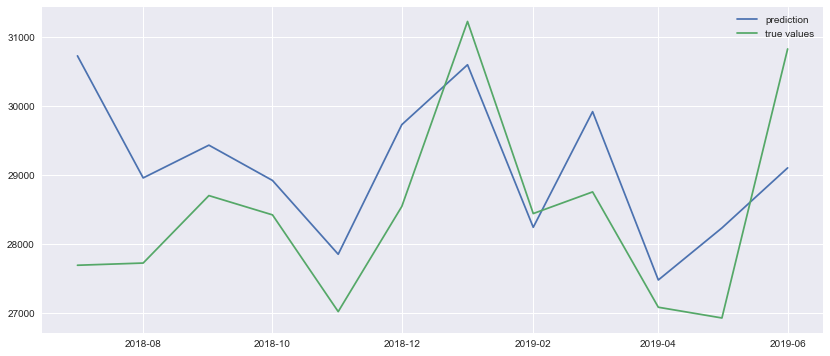

In [152]:
plt.figure(figsize=(14,6))
plt.plot(x_a_prevoir['Mois'],x_a_prevoir['prediction'], label='prediction')
plt.plot(x_a_prevoir['Mois'],x_a_prevoir['corrigee'], label='true values')
plt.legend()

# Sarima 

##  Stationnarisation de la série

In [153]:
from statsmodels.tsa.stattools import adfuller, kpss

In [154]:
adfuller(serie_corr_df['corrigee'])[1]

0.3682866645959178

adfuller : H0 la serie n'est pas stationnaire'


P_values

In [155]:
kpss(serie_corr_df['corrigee'])[1]

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


0.08517684021448321

KPSS : H0 la serie est stationnaire 
    
    P_values<5% rejette H0

Ici on accepte mais la P-value tres proche du seuil critique

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


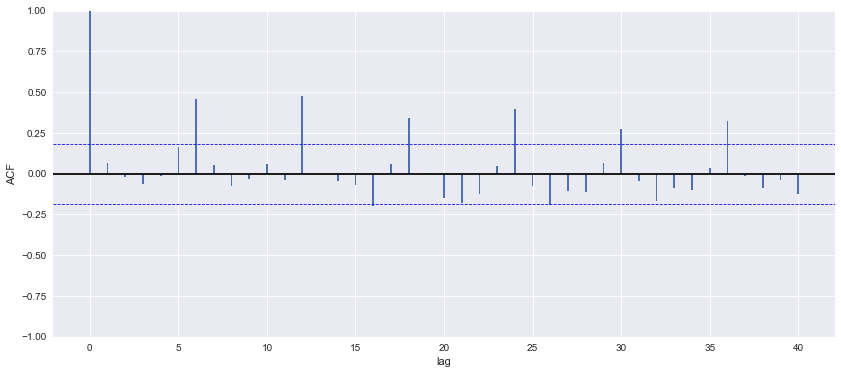

In [156]:
from statsmodels.tsa.stattools import acf, pacf
from functions import plot_sortie_acf

y_len = len(serie_corr_df['corrigee']) # variable nécessaire pour l'utilisation de plot_sortie_acf

plot_sortie_acf(acf(np.asarray(serie_corr_df['corrigee'])), y_len)

La sortie ACF présente une décroissance lente vers 0, ce qui traduit un problème de non-stationnarité. On effectue donc une différenciation  (𝐼−𝐵)  .

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


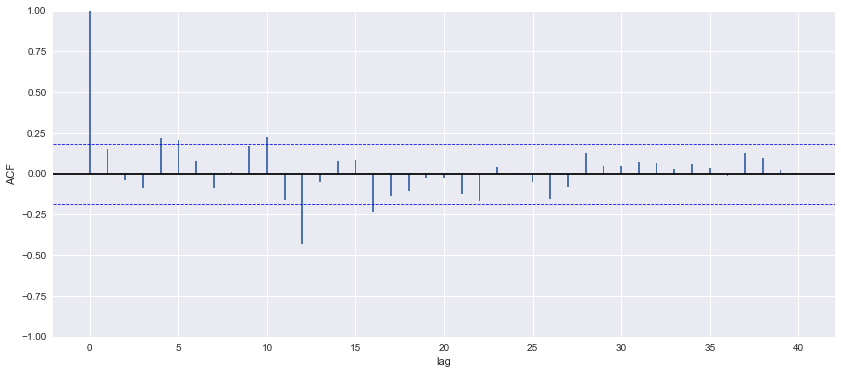

In [157]:
y_dif1 = serie_corr_df['corrigee'] - serie_corr_df['corrigee'].shift(12)

plot_sortie_acf(acf(np.asarray(y_dif1[13:])), y_len)

q=1
Q=1

In [158]:
adfuller(y_dif1[12:])[1]
#adfuller : H0 la serie n'est pas stationnaire'

0.005691344568372587

In [159]:
kpss(y_dif1[12:])[1]

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


0.1

La sortie ACF de la série ainsi différenciée présente encore une décroissance lente vers 0 pour les multiples de 12. On effectue cette fois la différenciation  (𝐼−𝐵^12)  .

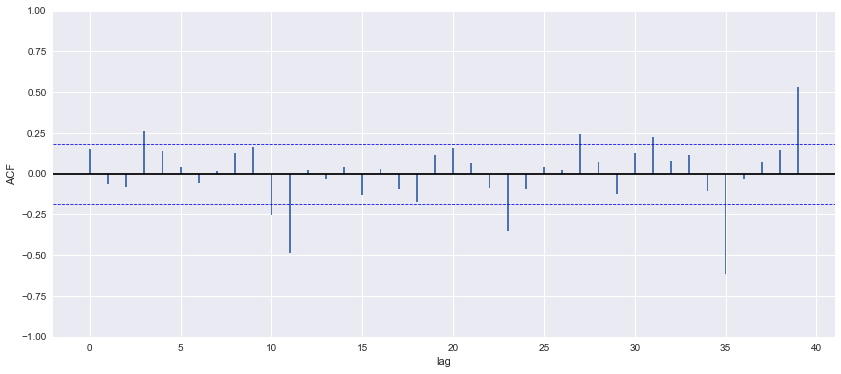

In [160]:
plot_sortie_acf(pacf(np.asarray(y_dif1[13:])), y_len, pacf=True)

In [161]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

model1 = SARIMAX(np.asarray(x_tronc["corrigee"]), order=(1,0,1), seasonal_order=(1,1,1,12))
results1 = model1.fit()
print(results1.summary())

#print('Retard : p-value')
#for elt in [6, 12, 18, 24, 30, 36]:
    #print('{} : {}'.format(elt, acorr_ljungbox(results1.resid, lags=elt)[1].mean()))

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  102
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -766.227
Date:                            Sat, 14 Dec 2019   AIC                           1542.454
Time:                                    10:18:06   BIC                           1554.953
Sample:                                         0   HQIC                          1547.494
                                            - 102                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9489      0.031     30.241      0.000       0.887       1.010
ma.L1         -0.9064      0.036   

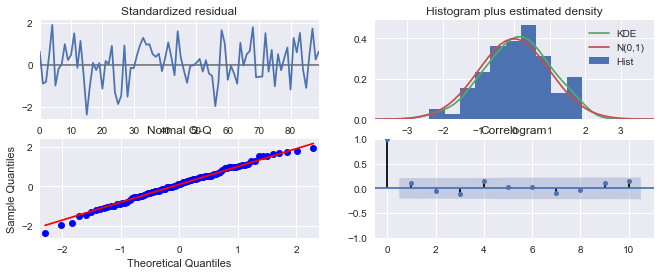

In [163]:
results1.plot_diagnostics()
plt.show()

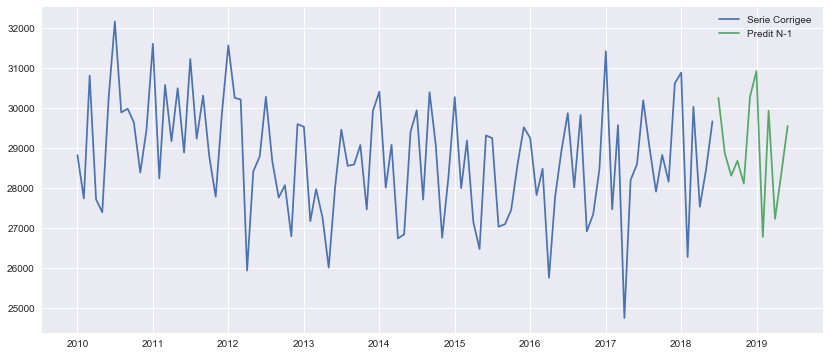

In [172]:
model1 = SARIMAX(np.asarray(x_tronc["corrigee"]), order=(1,0,1), seasonal_order=(1,1,1,12))
results1 = model1.fit()
sarima_pred=results1.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(x_tronc['Mois'],x_tronc['corrigee'], label='Serie Corrigee ')
plt.plot(pd.date_range(x_tronc.Mois[x_tronc.shape[0]-1],
                       periods=12, freq='M'), sarima_pred, label='Predit N-1')
plt.legend()
#plt.show()

In [162]:
pred_model2tronc = results1.get_forecast(12)
pred_tronc = pred_model2tronc.predicted_mean
MAE_sarima_model2=np.abs(x_a_prevoir['corrigee']-pred_tronc).mean()
MAE_sarima_model2

1098.9099978770716

In [164]:
serie_corr_df.shape

(114, 3)

# Optimal SARIMA

In [165]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(x_tronc["corrigee"],
                         test='adf',
                          m=12,
                         seasonal=True,
                         d=0, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 1, 1, 12); AIC=1557.397, BIC=1577.396, Fit time=2.548 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=1556.826, BIC=1561.826, Fit time=0.026 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=1552.391, BIC=1562.390, Fit time=0.283 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1552.771, BIC=1562.771, Fit time=0.257 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=1550.853, BIC=1558.352, Fit time=0.038 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 1, 12); AIC=1552.358, BIC=1562.357, Fit time=0.434 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 1, 12); AIC=1553.553, BIC=1566.052, Fit time=1.164 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=1552.832, BIC=1562.831, Fit time=0.066 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=1552.855, BIC=1562.854, Fit time=0.245 seconds
Fit ARIMA: order=(2, 0, 1) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  102
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -772.426
Date:                            Sat, 14 Dec 2019   AIC                           1550.853
Time:                                    10:18:12   BIC                           1558.352
Sample:                                         0   HQIC                          1553.877
                                            - 102                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -71.7965    138.702     -0.518      0.605    -343.648     200.055
ar.L1          0.1588      0.099      1.605      0.108      -0.035       0.353
sigma2      1.684e+06   2.58e+05      6.536      0.000    1.18e+06    2.19e+06
===================================================================================
Ljung-Box (Q):                       64.54   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.01   Prob(JB):                         1.00
Heteroskedasticity (H):               0.83   Skew:                             0.01
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [166]:
#pred_model2tronc = smodel.predict(12)
pred_tronc = smodel.predict(12)

In [167]:
MAE_sarima_model_optim=np.abs(x_a_prevoir['corrigee']-pred_tronc).mean()
MAE_sarima_model_optim

1246.9854384675446

# Prédiction pour année+1

In [168]:
from statsmodels.tsa.api import ExponentialSmoothing

y= np.asarray(serie_corr_df["corrigee"])
hw = ExponentialSmoothing(y, 
                          seasonal_periods=12, trend='add', 
                          seasonal='add').fit()
hw_pred = hw.forecast(12)

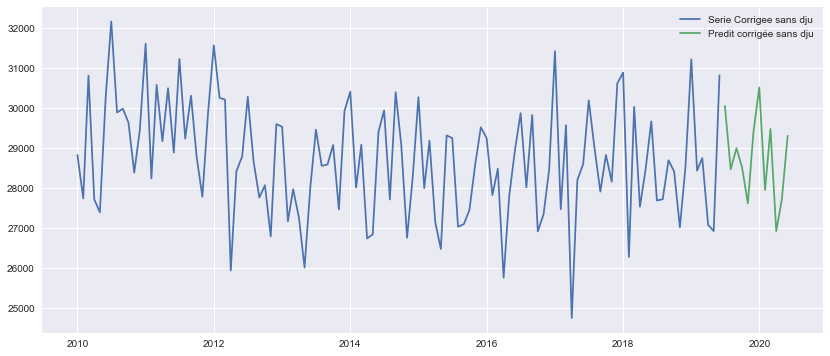

In [169]:
plt.figure(figsize=(14,6))
plt.plot(serie_corr_df['Mois'],serie_corr_df['corrigee'], label='Serie Corrigee sans dju')
plt.plot(pd.date_range(serie_corr_df.Mois[len(y)-1],
                       periods=12, freq='M'), hw_pred, label='Predit corrigée sans dju')
plt.legend()
#plt.show()